In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input/online-retail'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\bhavy\OneDrive\Desktop\major project\Online Retail.csv")
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [9]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Handle missing values
df.dropna(inplace=True)

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


In [20]:
print(df['InvoiceDate'].head(10))  # or .unique(), .sample(), etc.


0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
3   2010-01-12 08:26:00
4   2010-01-12 08:26:00
5   2010-01-12 08:26:00
6   2010-01-12 08:26:00
7   2010-01-12 08:28:00
8   2010-01-12 08:28:00
9   2010-01-12 08:34:00
Name: InvoiceDate, dtype: datetime64[ns]


In [21]:
# Create a new column for Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [22]:
# Total sales by country
total_sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()
print(total_sales_by_country)

                 Country   TotalPrice
0              Australia   137009.770
1                Austria    10154.320
2                Bahrain      548.400
3                Belgium    40910.960
4                 Brazil     1143.600
5                 Canada     3666.380
6        Channel Islands    20076.390
7                 Cyprus    12858.760
8         Czech Republic      707.720
9                Denmark    18768.140
10                  EIRE   250001.780
11    European Community     1291.750
12               Finland    22326.740
13                France   196626.050
14               Germany   221509.470
15                Greece     4710.520
16               Iceland     4310.000
17                Israel     6988.400
18                 Italy    16890.510
19                 Japan    35340.620
20               Lebanon     1693.880
21             Lithuania     1661.060
22                 Malta     2505.470
23           Netherlands   284661.540
24                Norway    35163.460
25          

In [23]:
december_sales = df[(df['InvoiceDate'].dt.month == 12) & (df['InvoiceDate'].dt.year == 2010)]
print(december_sales)

      InvoiceNo StockCode                          Description  Quantity  \
25281    538365     22469                HEART OF WICKER SMALL         8   
25282    538365    84030E        ENGLISH ROSE HOT WATER BOTTLE         1   
25283    538365     22112           CHOCOLATE HOT WATER BOTTLE         3   
25284    538365     22835      HOT WATER BOTTLE I AM SO POORLY         5   
25285    538365    84029E       RED WOOLLY HOTTIE WHITE HEART.         4   
...         ...       ...                                  ...       ...   
26724    538519     22326  ROUND SNACK BOXES SET OF4 WOODLAND          1   
26725    538519     21559    STRAWBERRY LUNCH BOX WITH CUTLERY         1   
26726    538519     22663          JUMBO BAG DOLLY GIRL DESIGN         1   
26727    538519     21931               JUMBO STORAGE BAG SUKI         1   
26728    538519     22386              JUMBO BAG PINK POLKADOT         1   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
25281 20

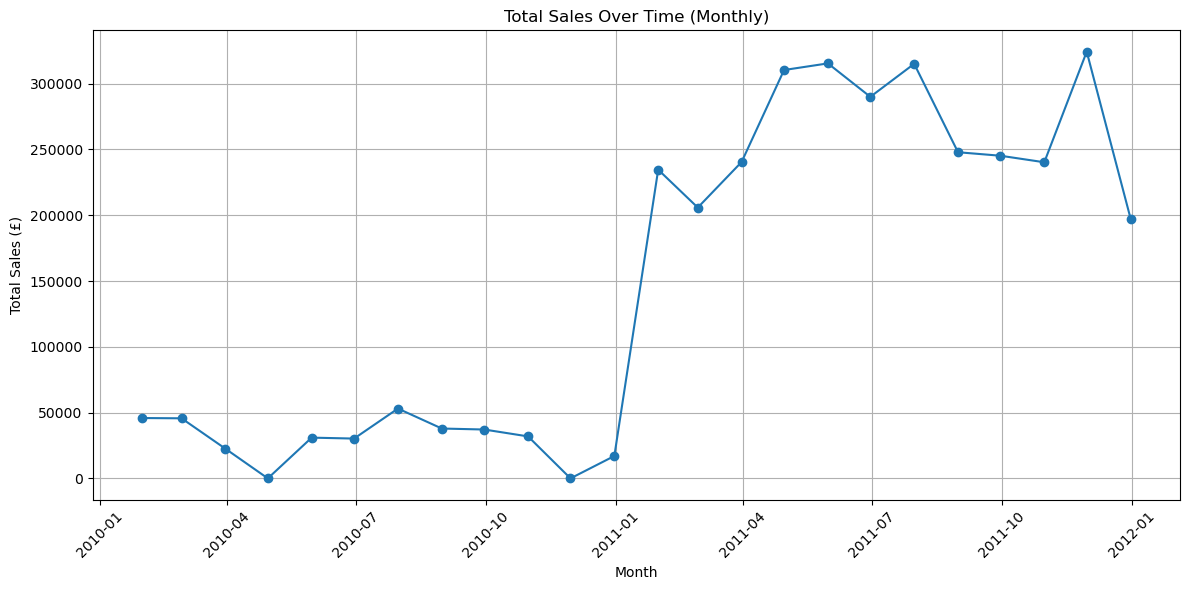

In [24]:
monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

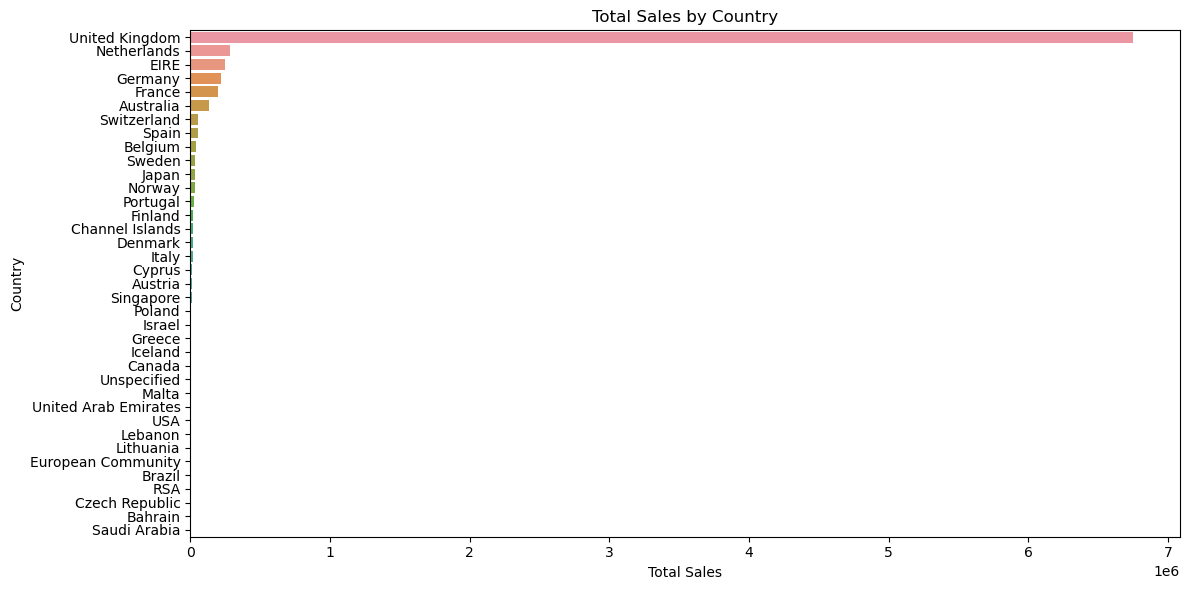

In [47]:
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPrice', y='Country', data=country_sales.sort_values('TotalPrice', ascending=False))
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

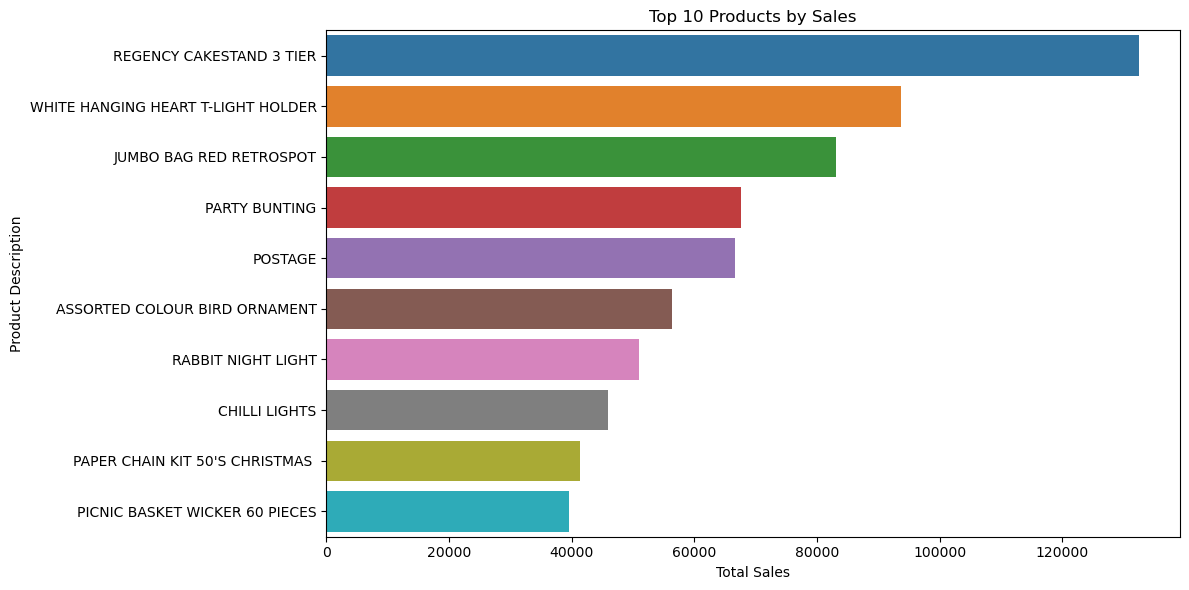

In [48]:
top_products = df.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPrice', y='Description', data=top_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

C:\Users\bhavy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


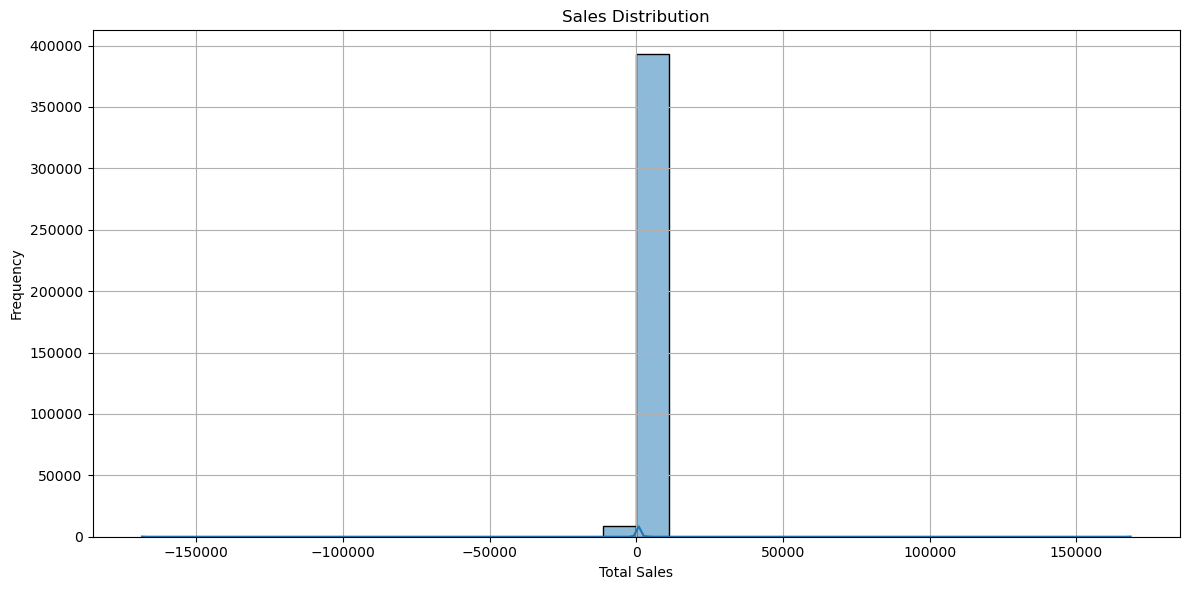

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPrice'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

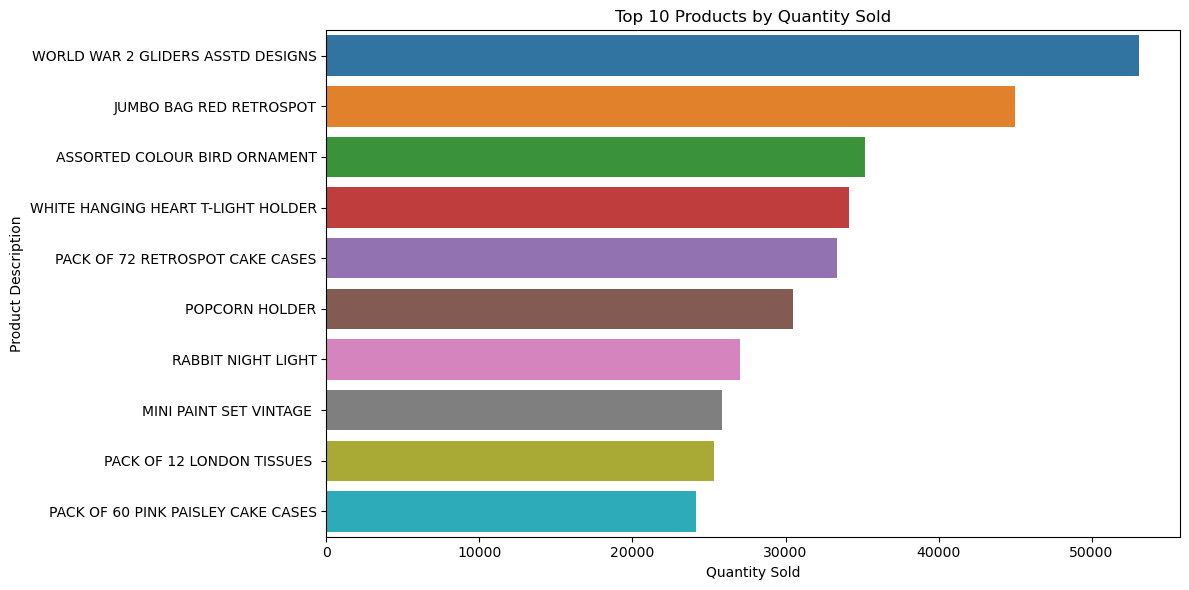

In [28]:
quantity_sold = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=quantity_sold)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

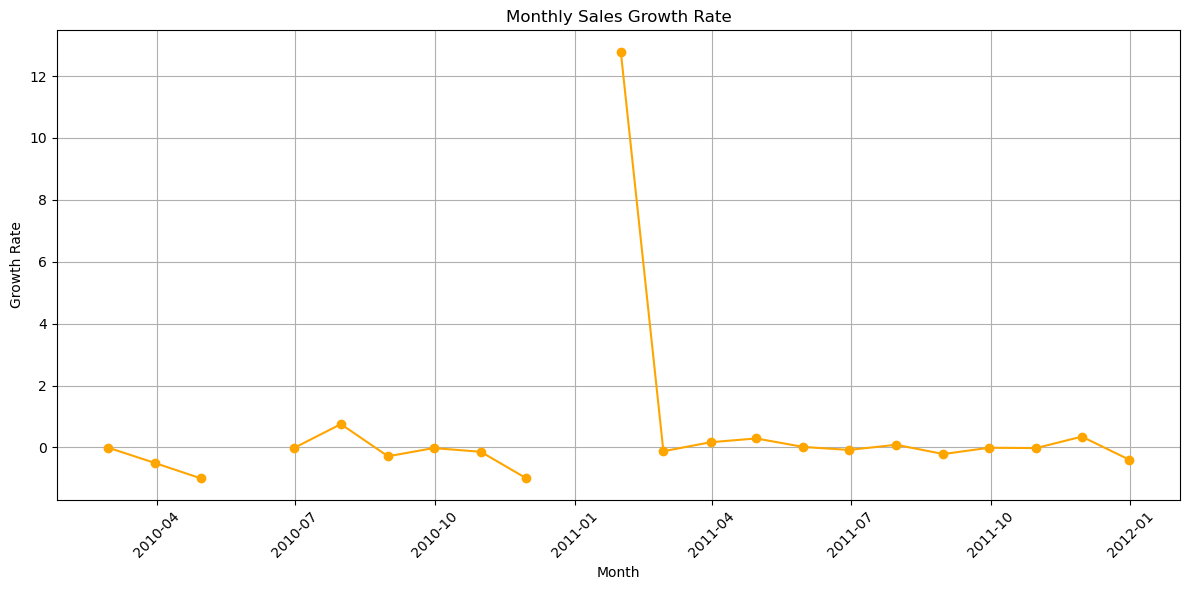

In [29]:
monthly_sales_growth = monthly_sales.pct_change().dropna()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_growth.index, monthly_sales_growth.values, marker='o', color='orange')
plt.title('Monthly Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

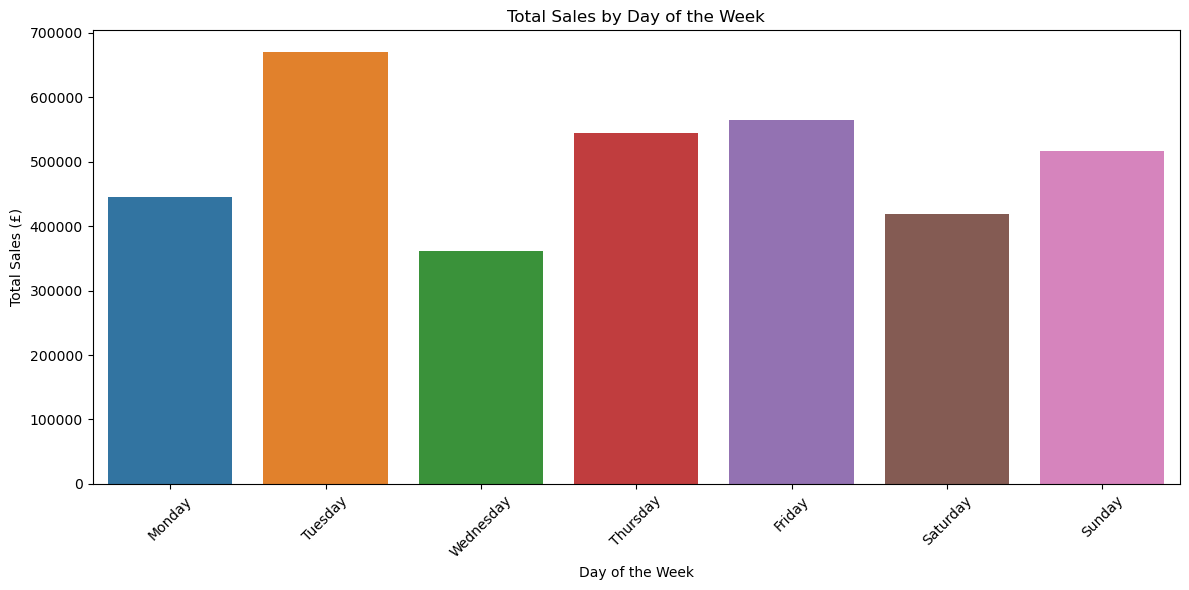

In [30]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

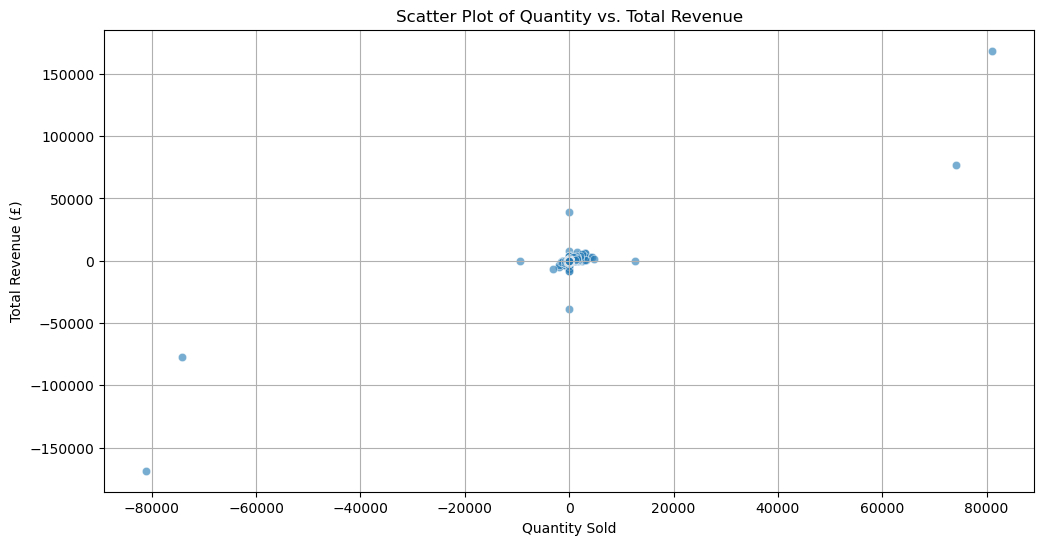

In [32]:
# 2. Scatter Plot of Quantity vs. Total Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='TotalRevenue', data=df, alpha=0.6)
plt.title('Scatter Plot of Quantity vs. Total Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Revenue (£)')
plt.grid()
plt.show()

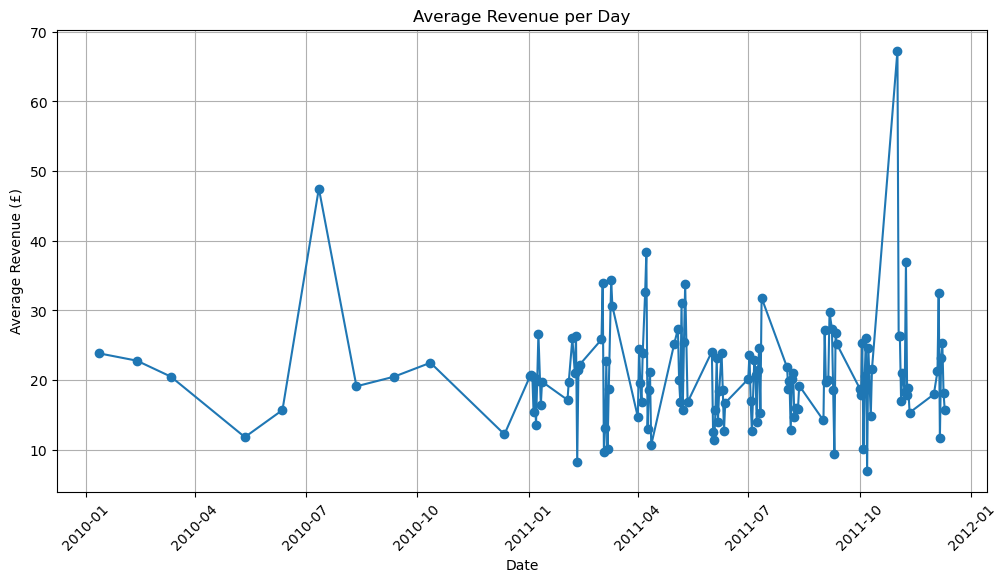

In [33]:
# 3. Line Plot of Average Revenue per Day
average_revenue_per_day = df.groupby(df['InvoiceDate'].dt.date)['TotalRevenue'].mean()
plt.figure(figsize=(12, 6))
average_revenue_per_day.plot(kind='line', marker='o')
plt.title('Average Revenue per Day')
plt.xlabel('Date')
plt.ylabel('Average Revenue (£)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

C:\Users\bhavy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhavy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhavy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


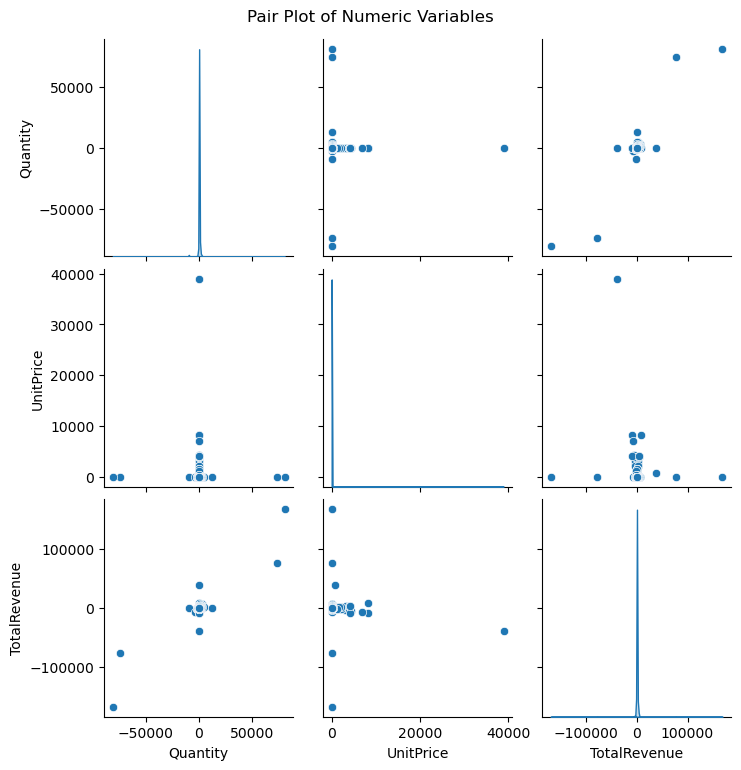

In [34]:
# 5. Pair Plot for Numeric Variables
sns.pairplot(df[['Quantity', 'UnitPrice', 'TotalRevenue']], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

In [36]:
# 6-Feature Engineering
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

In [37]:
# 8-Select relevant features
features = df[['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'DayOfWeek']]
target = df['TotalPrice']

In [38]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Histogram-based Gradient Boosting": HistGradientBoostingRegressor(random_state=42)
}

In [45]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: Mean Squared Error = {metrics['MSE']:.2f}, R^2 Score = {metrics['R^2']:.2f}")

Linear Regression: Mean Squared Error = 0.01, R^2 Score = 0.96
Decision Tree: Mean Squared Error = 0.01, R^2 Score = 0.94
Random Forest: Mean Squared Error = 0.01, R^2 Score = 0.95


                        MSE       R^2
Linear Regression  0.009178  0.957688
Decision Tree      0.012946  0.940316
Random Forest      0.010593  0.951164


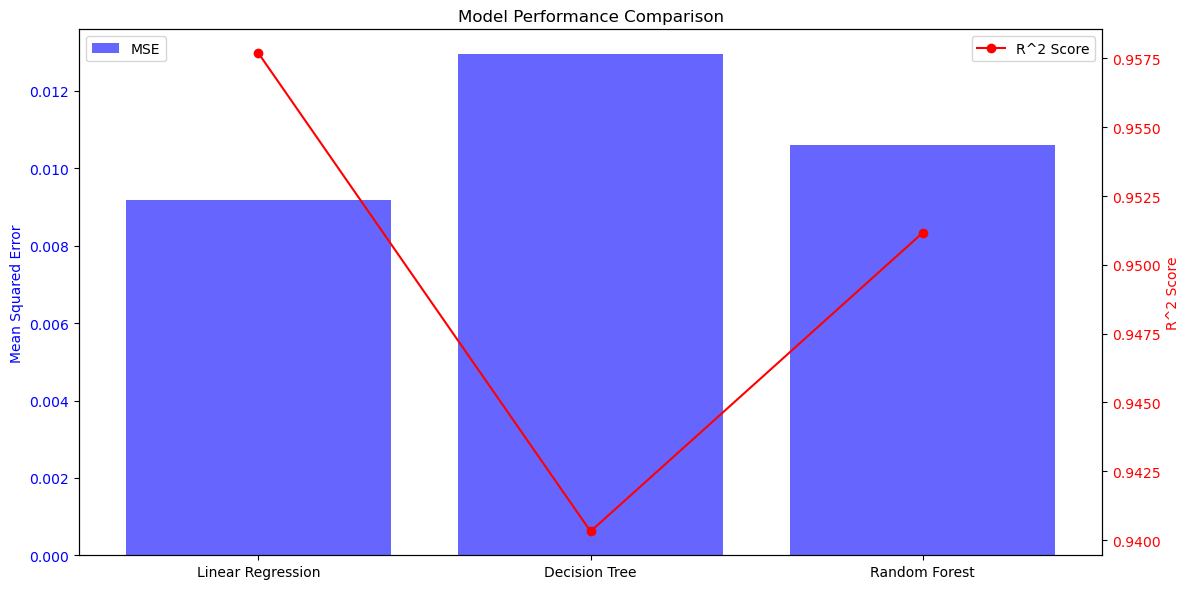

In [46]:
results_df = pd.DataFrame(results).T
print(results_df)

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MSE
ax1.bar(results_df.index, results_df['MSE'], color='b', alpha=0.6, label='MSE')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for R^2
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['R^2'], color='r', marker='o', label='R^2 Score')
ax2.set_ylabel('R^2 Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding titles and legends
plt.title('Model Performance Comparison')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show() 